In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#loading data
raw_data = pd.read_csv('house_prices.csv')

In [ ]:
raw_data

In [ ]:
raw_data = raw_data[['LotFrontage','LotArea','Street','Alley', 'LotShape', 'Utilities','Neighborhood','BldgType','HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Heating', 'Electrical', 'KitchenAbvGr', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice']]

In [ ]:
raw_data[:10]

In [ ]:
# Missing Values
raw_data['LotFrontage']

In [ ]:
# Check missing values in rows
raw_data.isnull().sum(axis=1)
# raw_data.isnull().sum(axis=1).max()

In [ ]:
raw_data.isnull().sum()

In [ ]:
# Missing Frontage - delete rows
processed_data = raw_data[raw_data['LotFrontage'].isnull() == False]

In [ ]:
processed_data

In [ ]:
# Can we do better?
raw_data[raw_data['LotFrontage'].isnull() == True]
# Other option: Delete column ?

In [ ]:
# Fill missing value
processed_data = raw_data.copy()
avg_lf = processed_data[processed_data['LotFrontage'].notnull()]['LotFrontage'].mean()
processed_data['LotFrontage'] = processed_data['LotFrontage'].fillna(avg_lf)

In [ ]:
# Can we do better?
plt.figure(figsize=(15,8))
plt.xlabel('LotArea', fontsize=15)
plt.ylabel('LotFrontage', fontsize=15)
plt.scatter(raw_data['LotArea'], raw_data['LotFrontage'])

In [ ]:
# Interpolate values
processed_data = raw_data.copy()
front_by_area = raw_data['LotFrontage']/raw_data['LotArea']
ratio_mean = front_by_area.mean()
estimates = processed_data[processed_data['LotFrontage'].isnull()]['LotArea']*ratio_mean
# processed_data.loc[processed_data['LotFrontage'].isnull()]['LotFrontage'] = estimates
processed_data['LotFrontage'] = processed_data['LotFrontage'].fillna(estimates)
# why this can be a bad idea. Use regressing/Probability distribution over multiple variables.

In [ ]:
# Nearest Neighbor
from sklearn.neighbors import NearestNeighbors

processed_data = raw_data.copy()
nn_train = processed_data[processed_data['LotFrontage'].notnull()][['LotFrontage', 'LotArea']]
nn_test = processed_data[processed_data['LotFrontage'].isnull()][['LotFrontage', 'LotArea']]

model = NearestNeighbors(n_neighbors=1).fit(nn_train[['LotArea']])
distances, indices = model.kneighbors(nn_test[['LotArea']])
indices = [val[0] for val in indices]

estimates = nn_train.iloc[indices]['LotFrontage'].values
processed_data.loc[processed_data['LotFrontage'].isnull(),'LotFrontage'] = estimates

In [ ]:
processed_data

In [ ]:
#processed_data
processed_data['Alley']

In [ ]:
# Delete feature
del processed_data['Alley']

In [ ]:
processed_data['Electrical']
# processed_data[processed_data['Electrical'].isnull()]

In [ ]:
# Fill mode
mode = processed_data['Electrical'].mode()[0]
processed_data['Electrical'] = processed_data['Electrical'].fillna(mode)

In [ ]:
processed_data.isnull().sum()

In [ ]:
# Visualize Sale Price
plt.figure(figsize=(15,8))
plt.ylabel('SalePrice', fontsize=20)
plt.plot(processed_data['SalePrice'])

In [ ]:
# Better Visualization
plt.figure(figsize=(15,8))
plt.ylabel('SalePrice', fontsize=20)
sorted_price = np.sort(processed_data['SalePrice'])
plt.plot(sorted_price)

In [24]:
# More visualizations
plt.figure(figsize=(15,8))
plt.xlabel('Lot Area', fontsize=20)
plt.ylabel('SalePrice', fontsize=20)
plt.scatter(processed_data['LotArea'], processed_data['SalePrice'])

In [25]:
#Removing outliers add prob. meth.
processed_data = processed_data[processed_data['LotArea'] < 100000]

In [26]:
#Removing outliers prability distribution
mean = processed_data['LotArea'].mean()
std = processed_data['LotArea'].std()
processed_data = processed_data[processed_data['LotArea'].between(mean-4*std,mean+4*std)]

In [27]:
#Removing non-predictive features
print processed_data.groupby(['Utilities'])['Utilities'].count()
processed_data[processed_data['Utilities'] == 'NoSeWa']
# very few cases to train
del processed_data['Utilities']

Utilities
AllPub    1440
NoSeWa       1
Name: Utilities, dtype: int64


<Container object of 10 artists>

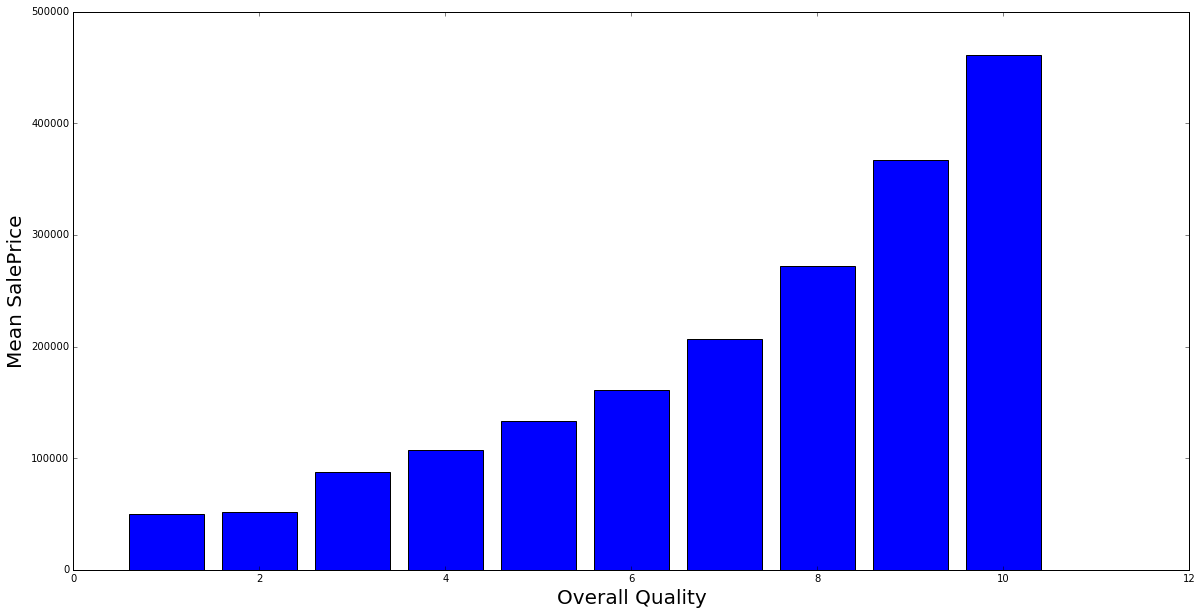

In [28]:
# Exploratory Analysis
plt.figure(figsize=(20,10))
plt.ylabel('Mean SalePrice', fontsize=20)
plt.xlabel('Overall Quality', fontsize=20)
qlty_grps = processed_data.groupby(['OverallQual'])['SalePrice'].mean()
plt.bar( qlty_grps.index, qlty_grps.values, align='center')

<Container object of 9 artists>

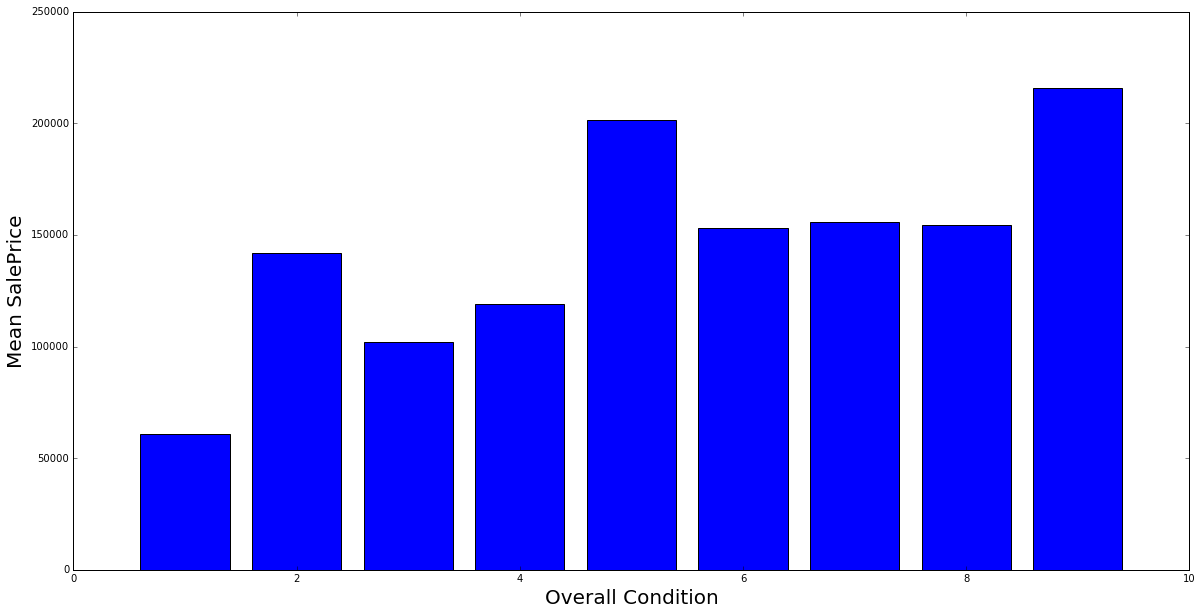

In [29]:
plt.figure(figsize=(20,10))
plt.ylabel('Mean SalePrice', fontsize=20)
plt.xlabel('Overall Condition', fontsize=20)
cdtn_grps = processed_data.groupby(['OverallCond'])['SalePrice'].mean()
plt.bar( cdtn_grps.index, cdtn_grps.values, align='center')

([<matplotlib.axis.XTick at 0x1158f5cd0>,
 <a list of 4 Text xticklabel objects>)

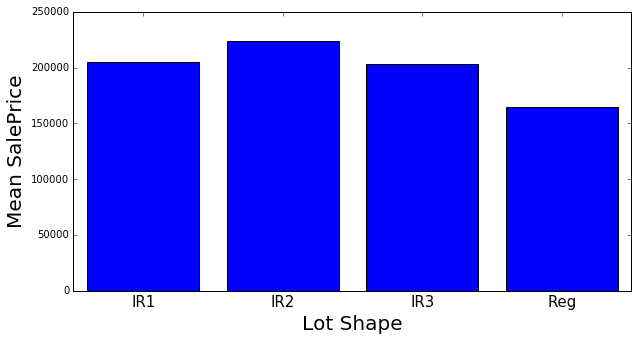

In [30]:
plt.figure(figsize=(10,5))
plt.ylabel('Mean SalePrice', fontsize=20)
plt.xlabel('Lot Shape', fontsize=20)
shape_grps = processed_data.groupby(['LotShape'])['SalePrice'].mean()
plt.bar( range(len(shape_grps)), shape_grps.values, align='center')
plt.xticks(range(len(shape_grps)), shape_grps.index, size=15)

In [31]:
#One hot encoding
processed_data['Street'].nunique()
# pd.get_dummies(processed_data['Street'])

2

In [42]:
processed_data = pd.concat([processed_data, pd.get_dummies(processed_data['Street'])], axis=1)

In [44]:
processed_data

,LotFrontage,LotArea,Street,LotShape,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Heating,Electrical,KitchenAbvGr,YrSold,SaleType,SaleCondition,SalePrice,Grvl,Pave
0,65.0,8450,Pave,Reg,CollgCr,1Fam,2Story,7,5,2003,2003,GasA,SBrkr,1,2008,WD,Normal,208500,0.0,1.0
1,80.0,9600,Pave,Reg,Veenker,1Fam,1Story,6,8,1976,1976,GasA,SBrkr,1,2007,WD,Normal,181500,0.0,1.0
2,68.0,11250,Pave,IR1,CollgCr,1Fam,2Story,7,5,2001,2002,GasA,SBrkr,1,2008,WD,Normal,223500,0.0,1.0
3,60.0,9550,Pave,IR1,Crawfor,1Fam,2Story,7,5,1915,1970,GasA,SBrkr,1,2006,WD,Abnorml,140000,0.0,1.0
4,84.0,14260,Pave,IR1,NoRidge,1Fam,2Story,8,5,2000,2000,GasA,SBrkr,1,2008,WD,Normal,250000,0.0,1.0
5,85.0,14115,Pave,IR1,Mitchel,1Fam,1.5Fin,5,5,1993,1995,GasA,SBrkr,1,2009,WD,Normal,143000,0.0,1.0
6,75.0,10084,Pave,Reg,Somerst,1Fam,1Story,8,5,2004,2005,GasA,SBrkr,1,2007,WD,Normal,307000,0.0,1.0
7,75.0,10382,Pave,IR1,NWAmes,1Fam,2Story,7,6,1973,1973,GasA,SBrkr,1,2009,WD,Normal,200000,0.0,1.0
8,51.0,6120,Pave,Reg,OldTown,1Fam,1.5Fin,7,5,1931,1950,GasA,FuseF,2,2008,WD,Abnorml,129900,0.0,1.0
9,50.0,7420,Pave,Reg,BrkSide,2fmCon,1.5Unf,5,6,1939,1950,GasA,SBrkr,2,2008,WD,Normal,118000,0.0,1.0
